In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

# Set seaborn style and ignore warnings
sns.set(color_codes=True)
warnings.filterwarnings("ignore")

## **1. Importing Data**

In [ ]:
# The data was obtained using the OpenWeatherMap API and contains historical weather data for Tokyo. It covers the period from July 29, 2023, to July 28, 2024.
#OpenWeatherMap: https://openweathermap.org/
weather = pd.read_csv('https://raw.githubusercontent.com/coco2525/tokyo-weather-classification/refs/heads/main/sample_weather_data.csv')

Mounted at /content/drive


In [ ]:
# Display the first few rows of the dataframe
weather.head()

,Date,Max Temperature (F),Min Temperature (F),Humidity (%),Weather,Description,Rainfall (mm),Pressure (hPa),Wind Speed (m/s),Wind Direction (°),Clouds (%)
0,07/29/2023 15:00:00,84.61,78.62,71,Clear,clear sky,0.0,1015,5.14,200,0
1,07/29/2023 16:00:00,84.61,78.04,73,Clear,clear sky,0.0,1014,5.66,190,0
2,07/29/2023 17:00:00,83.62,75.74,73,Clear,clear sky,0.0,1014,5.14,190,0
3,07/29/2023 18:00:00,83.62,77.61,75,Clear,clear sky,0.0,1014,7.20,190,0
4,07/29/2023 19:00:00,83.62,74.75,75,Clear,clear sky,0.0,1015,5.14,200,0


In [ ]:
# Display the shape and info of the dataframe
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 8761 non-null   object 
 1   Max Temperature (F)  8761 non-null   float64
 2   Min Temperature (F)  8761 non-null   float64
 3   Humidity (%)         8761 non-null   int64  
 4   Weather              8761 non-null   object 
 5   Description          8761 non-null   object 
 6   Rainfall (mm)        8761 non-null   float64
 7   Pressure (hPa)       8761 non-null   int64  
 8   Wind Speed (m/s)     8761 non-null   float64
 9   Wind Direction (°)   8761 non-null   int64  
 10  Clouds (%)           8761 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 753.0+ KB


In [ ]:
#Check for any null or missing values
weather.isnull().values.any()

False

In [ ]:
# Convert 'Date' column to datetime format
weather['Date'] = pd.to_datetime(weather['Date'])
print(weather.dtypes)

Date                   datetime64[ns]
Max Temperature (F)           float64
Min Temperature (F)           float64
Humidity (%)                    int64
Weather                        object
Description                    object
Rainfall (mm)                 float64
Pressure (hPa)                  int64
Wind Speed (m/s)              float64
Wind Direction (°)              int64
Clouds (%)                      int64
dtype: object


In [ ]:
# Describe the dataset statistics
weather.describe()

,Date,Max Temperature (F),Min Temperature (F),Humidity (%),Rainfall (mm),Pressure (hPa),Wind Speed (m/s),Wind Direction (°),Clouds (%)
count,8761,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,2024-01-28 03:00:00,67.455005,61.427430,65.614770,0.358466,1012.228855,4.976860,177.086520,48.876156
min,2023-07-29 15:00:00,34.840000,28.260000,19.000000,0.000000,989.000000,0.000000,0.000000,0.000000
25%,2023-10-28 21:00:00,53.640000,48.110000,53.000000,0.000000,1007.000000,2.680000,70.000000,20.000000
50%,2024-01-28 03:00:00,67.640000,61.610000,66.000000,0.000000,1012.000000,4.630000,180.000000,75.000000
75%,2024-04-28 09:00:00,80.620000,74.750000,80.000000,0.000000,1017.000000,6.690000,290.000000,75.000000
max,2024-07-28 15:00:00,103.780000,97.610000,100.000000,35.790000,1031.000000,18.520000,360.000000,100.000000
std,NaN,15.508514,15.580578,17.595742,1.299256,6.800720,2.789778,115.512105,31.262431


In [ ]:
# Count occurrences of each weather type
weather_counts = weather['Weather'].value_counts()
print("Weather Counts:")
print(weather_counts)

Weather Counts:
Weather
Clouds          6015
Clear           1323
Rain            1268
Mist             105
Thunderstorm      28
Snow               9
Fog                7
Drizzle            3
Smoke              2
Squall             1
Name: count, dtype: int64


## **2. Data Visualization**

In [ ]:
# Extract month for grouping
weather['Month'] = weather['Date'].dt.month

# Calculate the average temperatures for each month
monthly_avg_max_temp = weather.groupby(['Month'])['Max Temperature (F)'].mean().reset_index()
monthly_avg_min_temp = weather.groupby(['Month'])['Min Temperature (F)'].mean().reset_index()

# Display the average temperatures
print(monthly_avg_max_temp)
print("\n")
print(monthly_avg_min_temp)

    Month  Max Temperature (F)
0       1            48.548038
1       2            49.378448
2       3            52.720215
3       4            65.661875
4       5            71.000820
5       6            77.217083
6       7            87.013634
7       8            88.368938
8       9            83.978861
9      10            70.258360
10     11            62.241000
11     12            53.133091


    Month  Min Temperature (F)
0       1            42.189382
1       2            43.622155
2       3            46.798817
3       4            59.912875
4       5            65.119691
5       6            71.750403
6       7            82.084605
7       8            82.041882
8       9            77.589347
9      10            63.530417
10     11            55.722833
11     12            46.878091


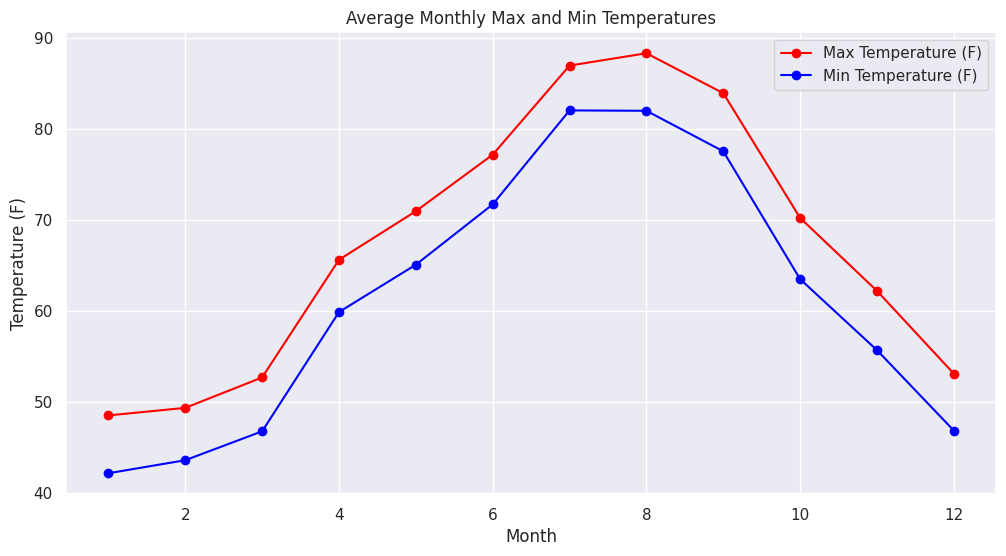

In [ ]:
# Plotting the average max temperature and min temperature
plt.figure(figsize=(12, 6))

plt.plot(monthly_avg_max_temp['Month'], monthly_avg_max_temp['Max Temperature (F)'],
         marker='o', label='Max Temperature (F)', color='red')
plt.plot(monthly_avg_min_temp['Month'], monthly_avg_min_temp['Min Temperature (F)'],
         marker='o', label='Min Temperature (F)', color='blue')

plt.title('Average Monthly Max and Min Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.legend()
plt.grid(True)
plt.show()

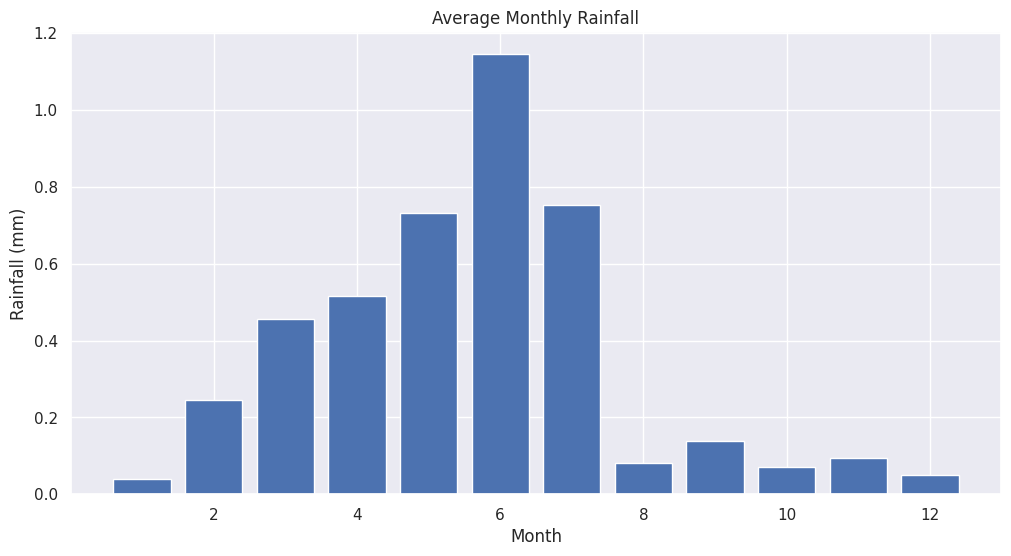

In [ ]:
# Calculate and plot the average monthly rainfall
monthly_avg_rainfall = weather.groupby(['Month'])['Rainfall (mm)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_rainfall['Month'], monthly_avg_rainfall['Rainfall (mm)'])
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

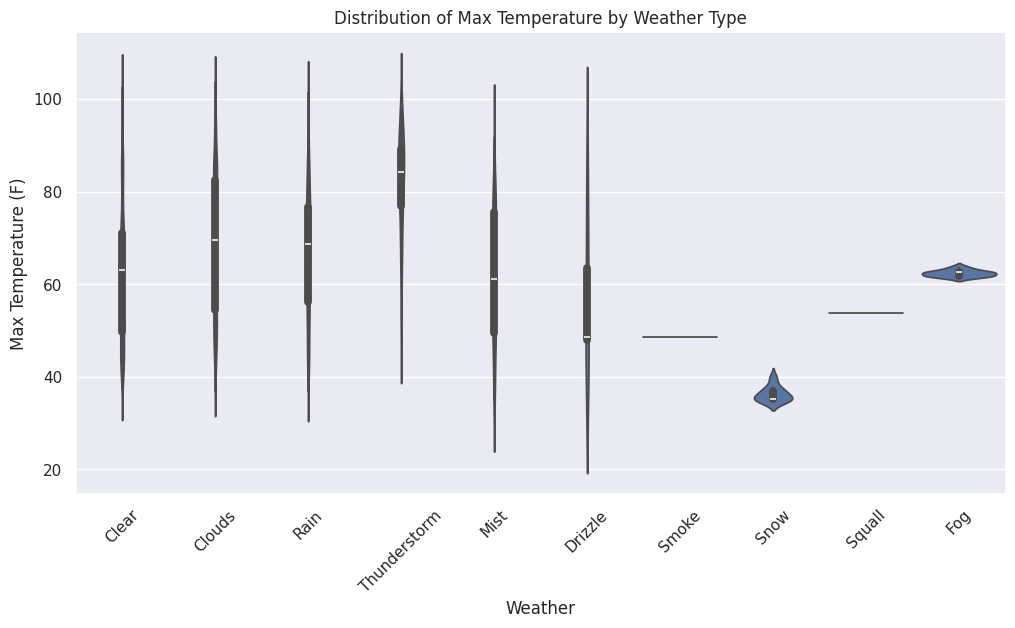

In [ ]:
# Creating a violin plot to show the distribution of max temperature by weather type
plt.figure(figsize=(12, 6))
sns.violinplot(x='Weather', y='Max Temperature (F)', data=weather)
plt.title('Distribution of Max Temperature by Weather Type')
plt.xlabel('Weather')
plt.ylabel('Max Temperature (F)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Generate correlation matrix
corr = weather[['Max Temperature (F)', 'Min Temperature (F)', 'Humidity (%)', 'Rainfall (mm)', 'Pressure (hPa)', 'Wind Speed (m/s)', 'Wind Direction (°)', 'Clouds (%)']].corr()

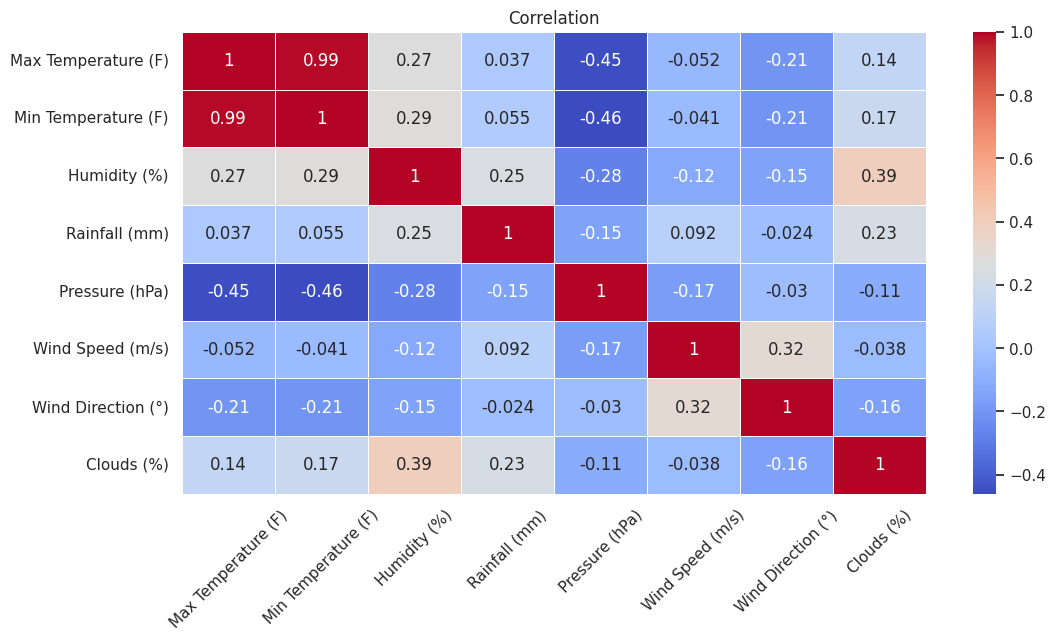

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5).set(title='Correlation')
plt.xticks(rotation=45)
plt.show()

## **3. Separating Features and Labels**

In [ ]:
# Selecting features and target variable. Max Temp chosen over Min Temp due to high correlation; avoids multicollinearity issues.
X = weather[['Max Temperature (F)', 'Humidity (%)', 'Rainfall (mm)', 'Pressure (hPa)', 'Wind Speed (m/s)', 'Wind Direction (°)', 'Clouds (%)']].values
y = weather[['Weather']].values

In [ ]:
# Splitting the Dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## **4. Standardize the features**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **5. Fitting the model to the training data**

In [ ]:
# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train.ravel())
gnb = GaussianNB().fit(X_train, y_train.ravel())
dt = DecisionTreeClassifier().fit(X_train, y_train.ravel())
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1).fit(X_train, y_train.ravel())

# Train various SVMs with different kernels
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

## **6. Performing 5-Fold Cross Validation**

In [ ]:
# K-Fold Cross Validation setup
k = 5
kf = KFold(n_splits=k)

**Cross-validation for each model**

In [ ]:
# Dictionary to store the classifiers and their names
classifiers = {
    'KNN': knn,
    'Naive Bayes': gnb,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Linear SVM': linear,
    'RBF SVM': rbf,
    'Poly SVM': poly,
    'Sigmoid SVM': sig
}

# Dictionary to store cross-validation accuracies
cv_accuracies = {}

In [ ]:
# Loop over classifiers to compute cross-validation accuracy
for name, model in classifiers.items():
    cv_result = cross_val_score(model, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
    cv_accuracies[name] = cv_result.mean()
    print(f'{name} Avg accuracy: {cv_result.mean()}')

KNN Avg accuracy: 0.9134064835385448
Naive Bayes Avg accuracy: 0.9346002331978551
Decision Tree Avg accuracy: 0.970155194901024
Random Forest Avg accuracy: 0.9818975179186094
Linear SVM Avg accuracy: 0.9761900203549553
RBF SVM Avg accuracy: 0.9388443278011994
Poly SVM Avg accuracy: 0.9416183718428881
Sigmoid SVM Avg accuracy: 0.8087102190916452


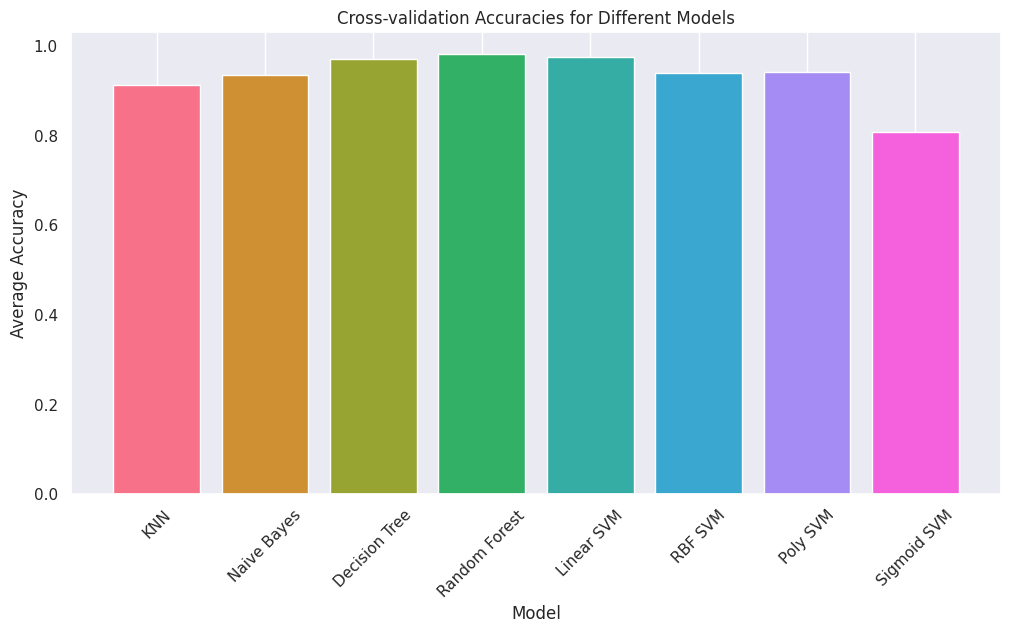

In [ ]:
# Plotting cross-validation accuracies
palette = sns.color_palette("husl", len(cv_accuracies))
plt.figure(figsize=(12, 6))
plt.bar(cv_accuracies.keys(), cv_accuracies.values(), color=palette)
plt.title('Cross-validation Accuracies for Different Models')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## **7. Evaluating the Models**

In [ ]:
# Predict and print classification reports for all models
# classification_report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print('-' * 70)

KNN Classification Report:
              precision    recall  f1-score   support

       Clear       0.98      0.94      0.96       407
      Clouds       0.92      0.99      0.95      1805
     Drizzle       0.00      0.00      0.00         2
         Fog       0.50      1.00      0.67         1
        Mist       0.56      0.16      0.24        32
        Rain       0.94      0.70      0.80       375
        Snow       0.00      0.00      0.00         1
Thunderstorm       0.00      0.00      0.00         6

    accuracy                           0.93      2629
   macro avg       0.49      0.47      0.45      2629
weighted avg       0.92      0.93      0.92      2629

----------------------------------------------------------------------
Naive Bayes Classification Report:
              precision    recall  f1-score   support

       Clear       1.00      0.99      0.99       407
      Clouds       0.98      1.00      0.99      1805
     Drizzle       0.00      0.00      0.00         2

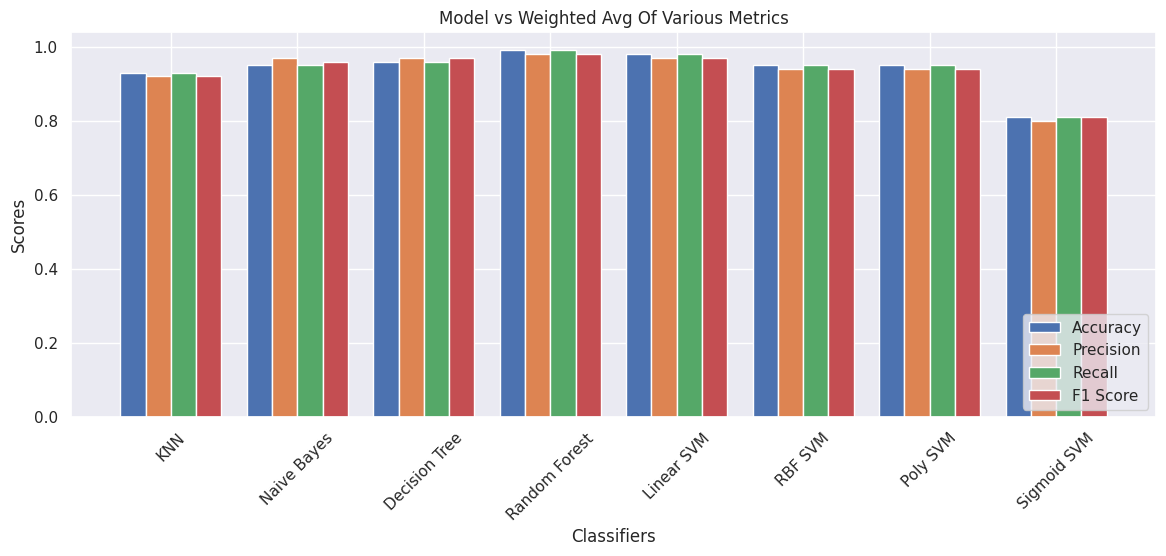

In [ ]:
# Accuracy scores for each classifier
accuracy_list = [0.93, 0.95, 0.96, 0.99, 0.98, 0.95, 0.95, 0.81]

# Weighted average precision for each classifier
precision_list = [0.92, 0.97, 0.97, 0.98, 0.97, 0.94, 0.94, 0.80]

# Weighted average recall for each classifier
recall_list = [0.93, 0.95, 0.96, 0.99, 0.98, 0.95, 0.95, 0.81]

# Weighted average F1 scores for each classifier
f1_list = [0.92, 0.96, 0.97, 0.98, 0.97, 0.94, 0.94, 0.81]

# Classifier names
classifier_names = [
    'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest',
    'Linear SVM', 'RBF SVM', 'Poly SVM', 'Sigmoid SVM'
]

# Plot the accuracy and weighted average precision, recall, and F1 scores
plt.figure(figsize=(14, 5))
x = np.arange(len(classifier_names))
plt.bar(x - 0.3, accuracy_list, 0.2, label='Accuracy')
plt.bar(x - 0.1, precision_list, 0.2, label='Precision')
plt.bar(x + 0.1, recall_list, 0.2, label='Recall')
plt.bar(x + 0.3, f1_list, 0.2, label='F1 Score')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Model vs Weighted Avg Of Various Metrics')
plt.xticks(x, classifier_names, rotation=45)
plt.legend(loc='lower right')
plt.show()

## **8. Saving the Model and Scaler**

In [ ]:
# Save the Random Forest model
rf_model = classifiers['Random Forest']
rf_model_filename = 'weather_model.pkl'
with open(rf_model_filename, 'wb') as model_file:
  pickle.dump(rf_model, model_file)

# Save the Linear SVM model
linear_model = classifiers['Linear SVM']
linear_model_filename = 'weather_model2.pkl'
with open(linear_model_filename, 'wb') as model_file:
  pickle.dump(linear_model, model_file)

# Save the scaler
scaler_filename = 'weather_scaler2.pkl'
scaler = sc
with open(scaler_filename, 'wb') as scaler_file:
  pickle.dump(scaler, scaler_file)